In [1]:
from astropy.table import Table, Column
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm

sys.path.insert(0, '../Modules')
import erqScaling
import erqMedSpec
import os

In [2]:
# Reading data
smp=Table.read('../LumMatch/LumMatch.fits')


iW3_0 = smp['i-w3']
kt80_0= smp['kurt80_gf']
rew_0 = smp['rew_gf']
rew_0  = np.log10(rew_0)
frat_0 = smp['frat_nv/civ']
fwhm_0 = smp['fwhm_gf']
rw3_0=smp['r-w3']
rz_0=smp['r-z']
iz_0 = iW3_0 - rw3_0 + rz_0
Lum_0 = smp['Lum']
z_dr12 = smp['z_dr12']
plate = smp['Plate']
mjd = smp['MJD']
fiber =  smp['FiberID']
X_0=np.array(list(zip(iW3_0, rew_0)))
# (X_scaled, mean_X, std_X) = scale(X_0)
# X, m, r =erqScaling.MinMaxScaler(X_0)
X = X_0
x_erq =  4.6  #(4.6-np.min(iW3_0))/(np.max(iW3_0)-np.min(iW3_0))
y_erq = 2  #(2- np.min(rew_0))/(np.max(rew_0)-np.min(rew_0))
Main_center = np.median(X, axis=0)
ERQ= X[(iW3_0>=x_erq) & (rew_0>=y_erq)]

print(Main_center)

[2.48746144 1.55517281]


100%|██████████| 20/20 [00:03<00:00,  5.04it/s]
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
100%|██████████| 652/652 [01:48<00:00,  6.02it/s]
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
100%|██████████| 18/18 [00:03<00:00,  5.88it/s]


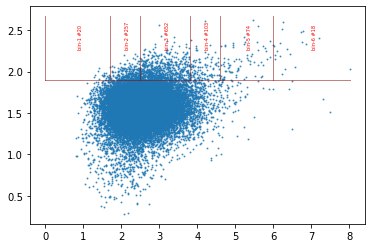

In [6]:
#  Med-Spec strip -> color
y0=1.9
dir = 'outData/strip-color/%.2f' %(y0)
os.system('mkdir -p ' + dir)
x_max = np.max(iW3_0)
y_max = np.max(rew_0)+0.05
x0 = [0,  1.7, 2.5, 3.8, 4.6, 6, x_max]
plt.scatter(iW3_0, rew_0, s=1, alpha=0.7)
plt.plot([0,x_max],[y0,y0], lw=1,alpha=0.5, c='darkred')
for i in range(len(x0)-1):
        
        mask = ((rew_0>=y0) & (iW3_0>=x0[i]) & (iW3_0<x0[i+1]))
        medSpec = erqMedSpec.stacker(z_dr12[mask], plate[mask], mjd[mask], fiber[mask])
        np.savetxt(dir+'/med-spec-strip-color-bin-%d.txt' %(i+1), medSpec)
#         medSpec = np.loadtxt(dir+'/med-spec-strip-color-bin-%d.txt' %(i+1))
        
        plt.plot([x0[i],x0[i]],[y0,y_max], c='darkred', lw=1, alpha=0.5)
        plt.text((x0[i]+x0[i+1])/2,(y0+y_max)/2, 'bin-%d #%d' %(i+1,sum(mask==True)), fontsize=5, c='red', rotation=90)
    
#      plotting Strips
plt.savefig(dir+'/strips-color.png', dpi=800, bbox_inches='tight', format='png')
plt.show()

bin: 1 1000 to 1980
bin: 2 1000 to 1980
bin: 3 1000 to 1980
bin: 4 1000 to 1980
bin: 5 1000 to 1980
bin: 6 1000 to 1980


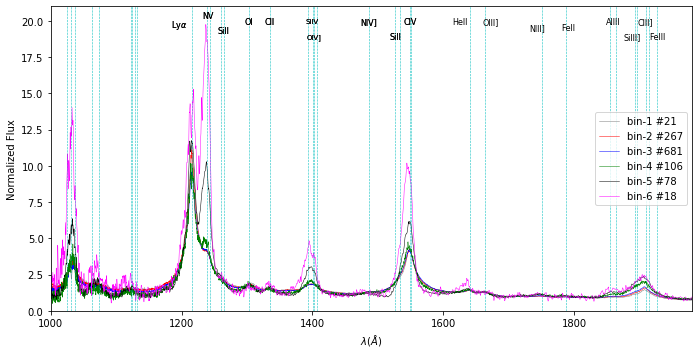

bin: 1 1150 to 1980
bin: 2 1150 to 1980
bin: 3 1150 to 1980
bin: 4 1150 to 1980
bin: 5 1150 to 1980
bin: 6 1150 to 1980


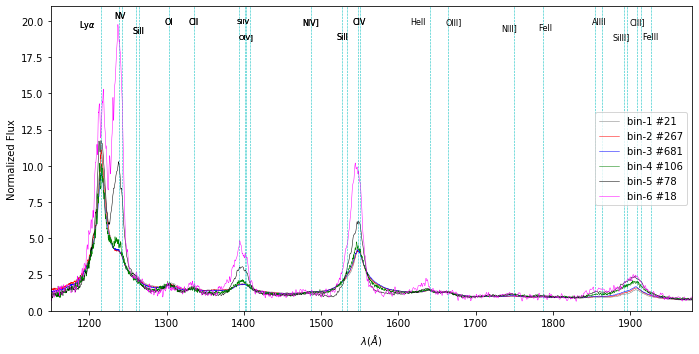

bin: 1 1150 to 2850
bin: 2 1150 to 2850
bin: 3 1150 to 2850
bin: 4 1150 to 2850
bin: 5 1150 to 2850
bin: 6 1150 to 2850


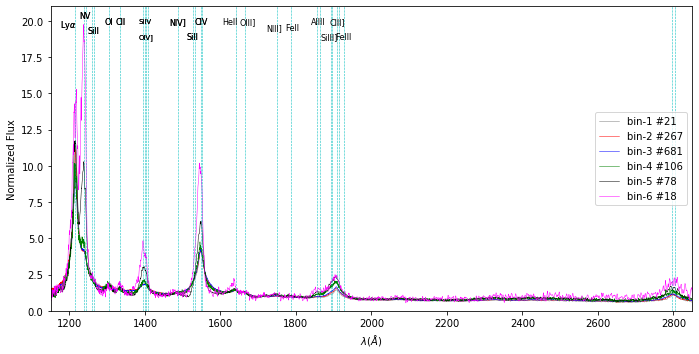

bin: 1 1150 to 1700
bin: 2 1150 to 1700
bin: 3 1150 to 1700
bin: 4 1150 to 1700
bin: 5 1150 to 1700
bin: 6 1150 to 1700


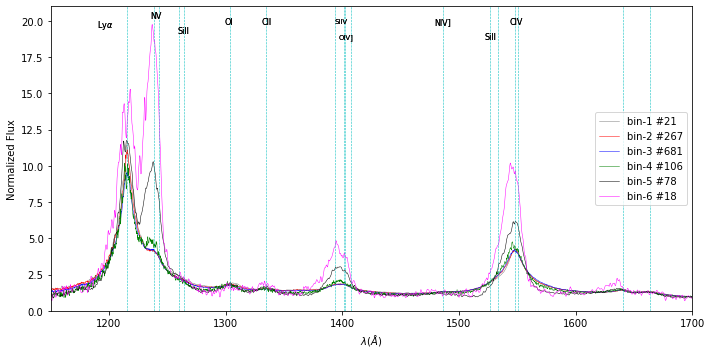

In [24]:
# Plotting Spectra -> color
#  PLotting
from line_db import line_db
from matplotlib import cm
from scipy import ndimage

# c = cm.get_cmap('coolwarm', 7)
c=['gray', 'red', 'blue','green', 'black' , 'magenta']
ymax=21

ymin=0.02*ymax
fs=8
fs1=7
y_median = 0.95*ymax
med_step=.8
legend_loc=7

# -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)

#  Median properties in each bin
rew_0 = smp['rew_gf']


imw3_bin_med =[]
REW_bin_med = []
fwhm_bin_med = []
kt80_bin_med = []
frat_bin_med = []
iz_bin_med = []
Lum_bin_med = []
Bin=[]
BinPop=[]
for b in range(1,len(x0)):
    mask = np.loadtxt(dir+'/Bin-color-%d-Mask.txt' %(b))
    BinPop.append(sum(mask==True))
    Bin.append("{0:.0f}".format(b))
    imw3_bin_med.append("{0:.2f}".format(np.median(iW3_0[mask==True])))
    REW_bin_med.append("{0:.0f}".format(np.median(rew_0[mask==True])))
    fwhm_bin_med.append("{0:.0f}".format(np.median(fwhm_0[mask==True])))
    kt80_bin_med.append("{0:.2f}".format(np.median(kt80_0[mask==True])))
    frat_bin_med.append("{0:.2f}".format(np.median(frat_0[mask==True])))
    iz_bin_med.append("{0:.2f}".format(np.median(iz_0[mask==True])))
    Lum_bin_med.append("{0:.2f}".format(np.median(Lum_0[mask==True])))

tabProperties = Table([Bin,BinPop, imw3_bin_med, REW_bin_med, fwhm_bin_med, kt80_bin_med, frat_bin_med, iz_bin_med, Lum_bin_med],
                      names=('Bin','nBin', 'iw3', 'rew', 'fwhm', 'kt80', 'frat', 'iz', 'Lum'))
if os.path.exists(dir+ '/Strip-color-Properties.fits'):
    os.system('rm '+ dir+'/Strip-color-Properties.fits')
tabProperties.write(dir+ '/Strip-color-Properties.fits' , format='fits')

for ii in range(4):

    if(ii==0): lambda_min = 1000; lambda_max = 1980
    if(ii==1): lambda_min = 1150; lambda_max = 1980
    if(ii==2): lambda_min = 1150; lambda_max = 2850
    if(ii==3): lambda_min = 1150; lambda_max = 1700
    fig = plt.figure(figsize=(11.5,5.6))
    line_db(ymax, fs, fs1, lambda_max)

    plt.xlim(lambda_min,lambda_max)
    plt.ylim(ymin, ymax)
    x_median=lambda_min+200

    for b in range(1,len(x0)):
        print('bin:', b, lambda_min, 'to', lambda_max)
        medSpec=np.loadtxt(dir+'/med-spec-strip-color-bin-%d.txt' %(b))
        plt.ylabel('Normalized Flux')
        plt.xlabel(r'$\lambda  (\AA)$')


        if(BinPop[b-1]<100):
            SmoothedMedSpec = ndimage.filters.gaussian_filter1d(medSpec,2.0)
        else:
            SmoothedMedSpec = medSpec

        # masking for plot ranges
        ind = (wgrid>lambda_min) & (wgrid<lambda_max)
        plt.plot(wgrid[ind],  SmoothedMedSpec[ind], lw = .5, c=c[b-1], 
                     label='bin-%d #%d' %(b, BinPop[b-1]))




    plt.legend(loc=7)

    line_db(ymax, fs, fs1, ii) 
    fig_path = dir + '/med-spec-%d-%d-strip-color.png'%(lambda_min, lambda_max)

    plt.savefig(fig_path, format='png', dpi=800, bbox_inches='tight')
    plt.show()